In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

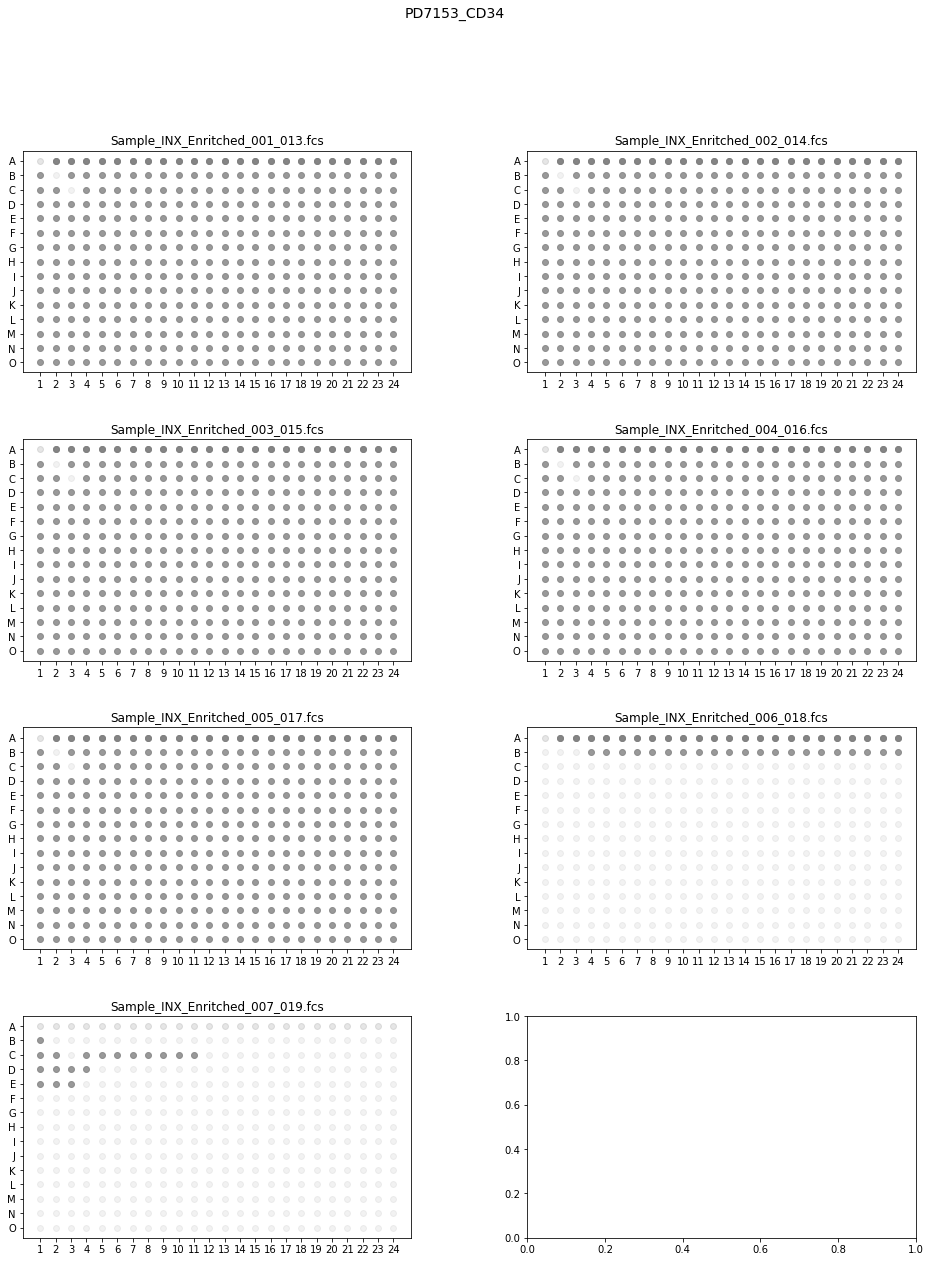

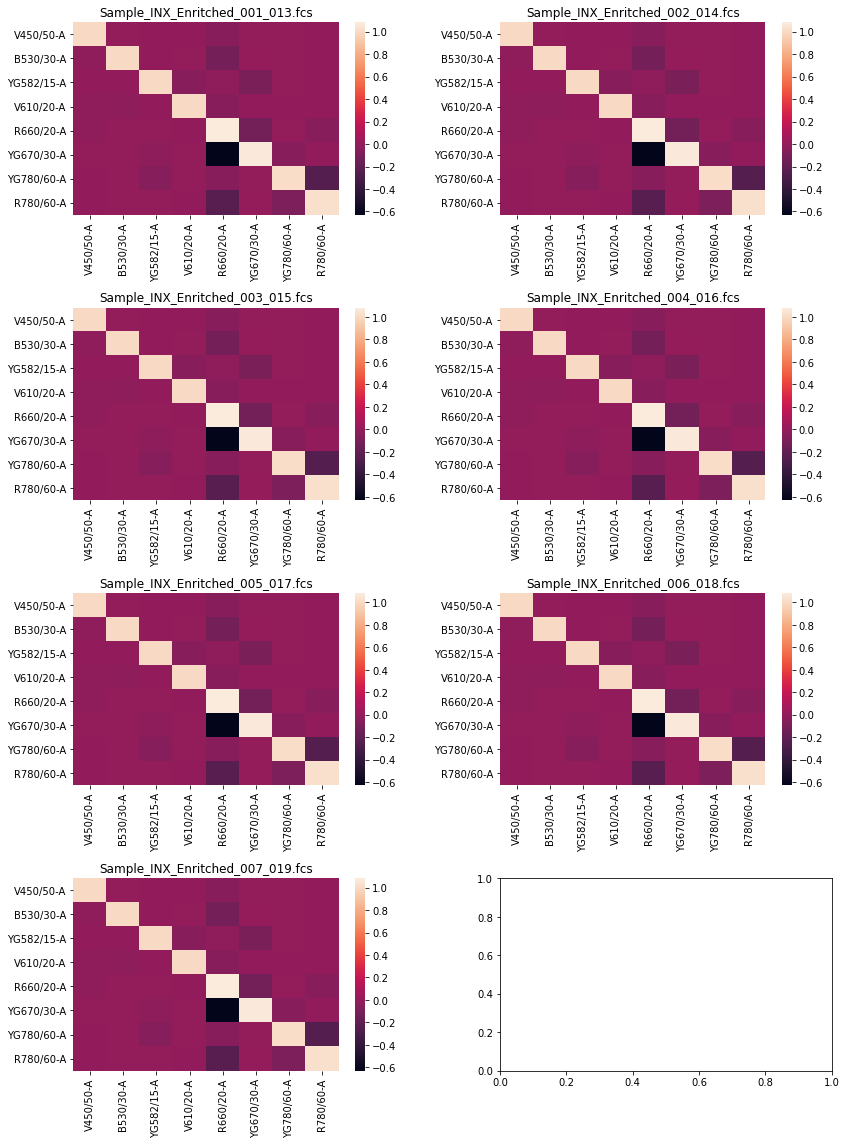

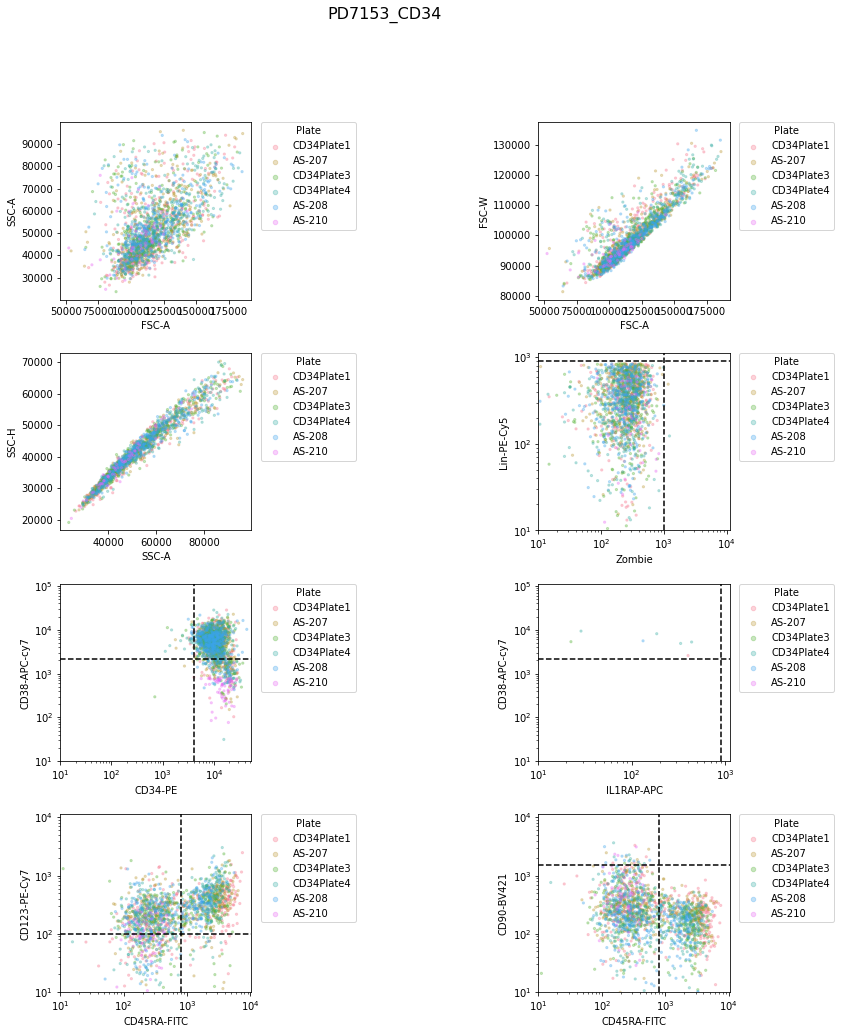

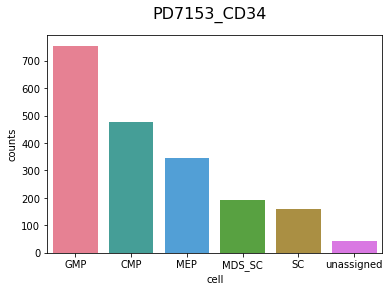

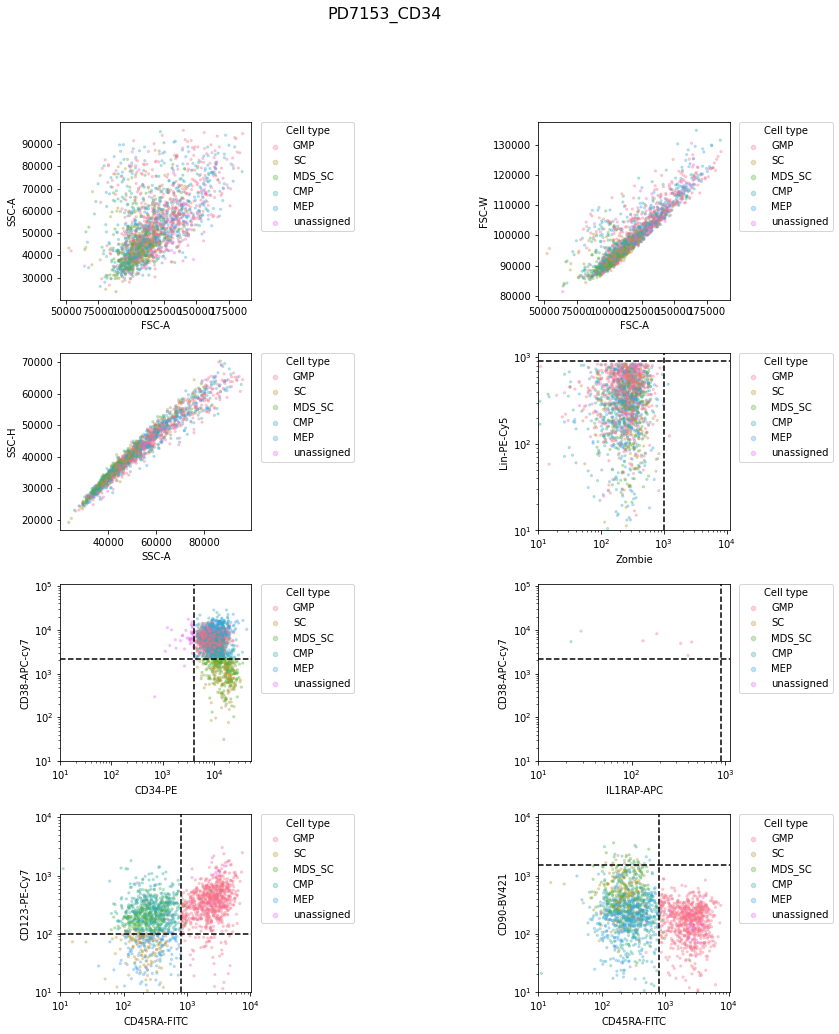

In [2]:
#PD7153 CD34 parameters

directory = '../Data/PD7153_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['CD34Plate1', 'AS-207','CD34Plate3', 'CD34Plate4', 'AS-208', 'AS-210a', 'AS-210' ] #one plate splills over 2 files, rename later

plate_key = dict(zip(files, plates))

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
#Tweak for PD7153
gates = {
    'Lin-PE-Cy5': 900,
    'CD34-PE': 4100 ,
    'CD38-APC-cy7': 2200 ,  #2200 = 10% on Flowjo, 2900 = 15% , sort looks ~1000
    'CD45RA-FITC': 800 ,
    'CD123-PE-Cy7': 100,
    'Zombie': 1000,
    'IL1RAP-APC': 900,  #set from FlowJo looking at unstained, not convinced this worked
    'CD90-BV421': 1500
}

label = 'PD7153_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
#Need to rename placeholder plate AS-210a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'AS-210a':'AS-210'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = True, save = False)

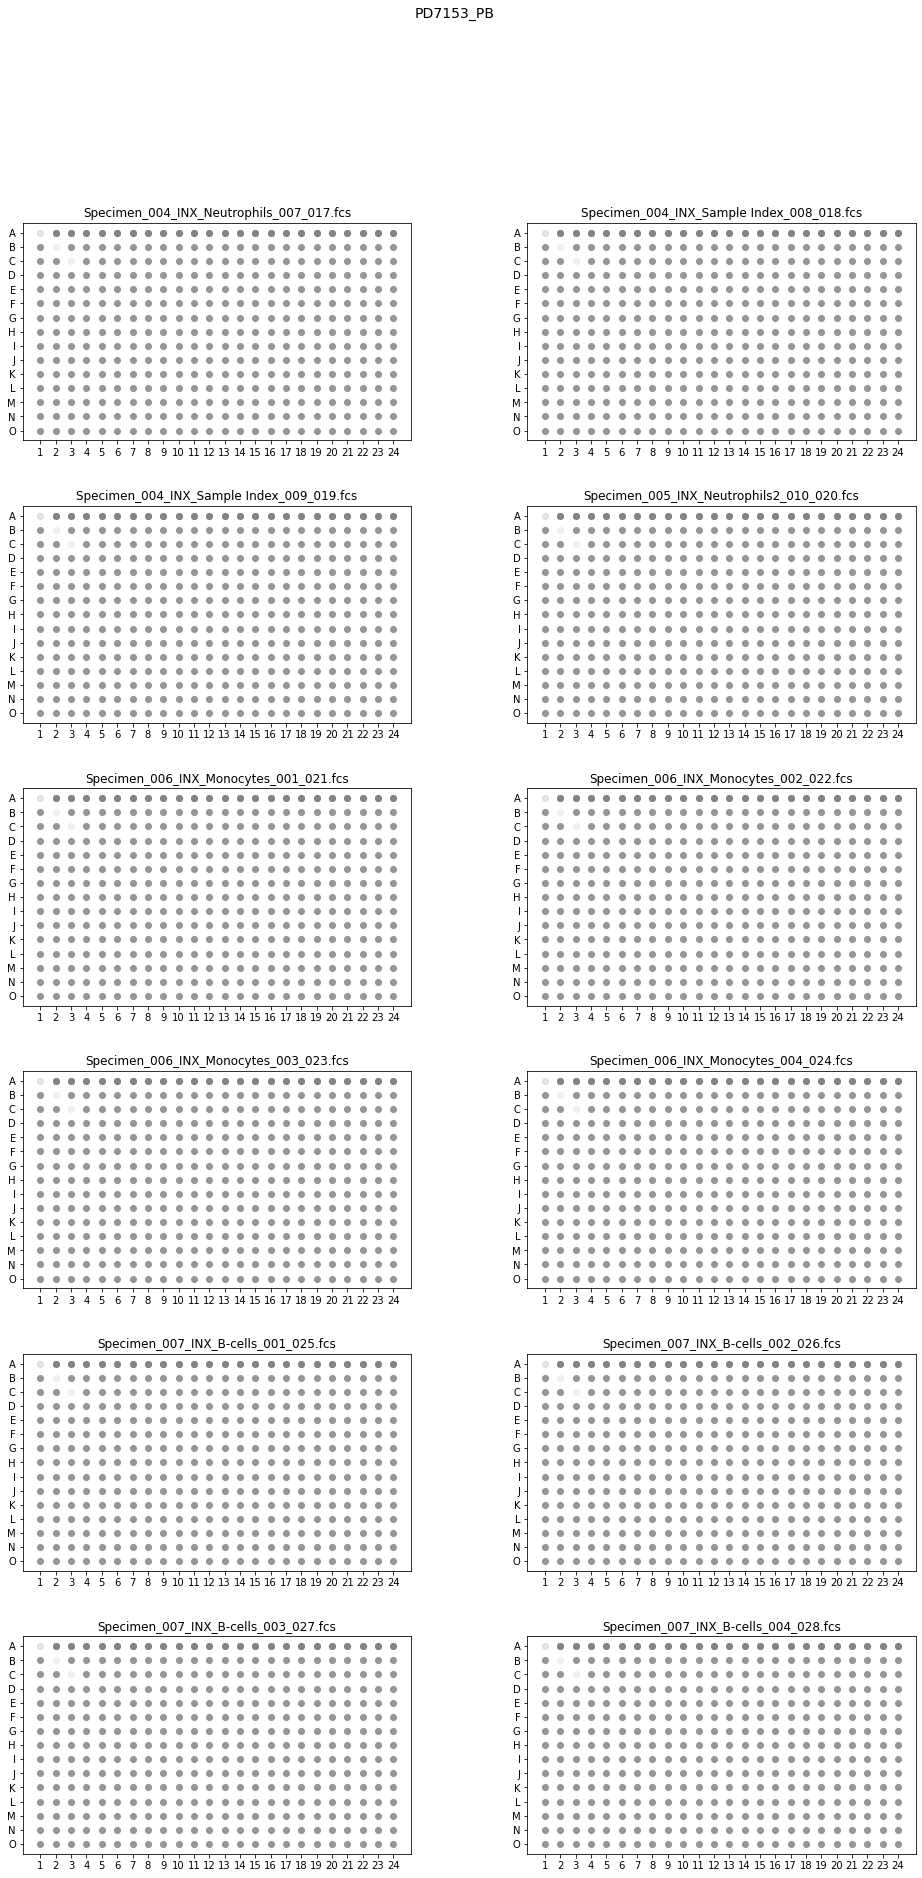

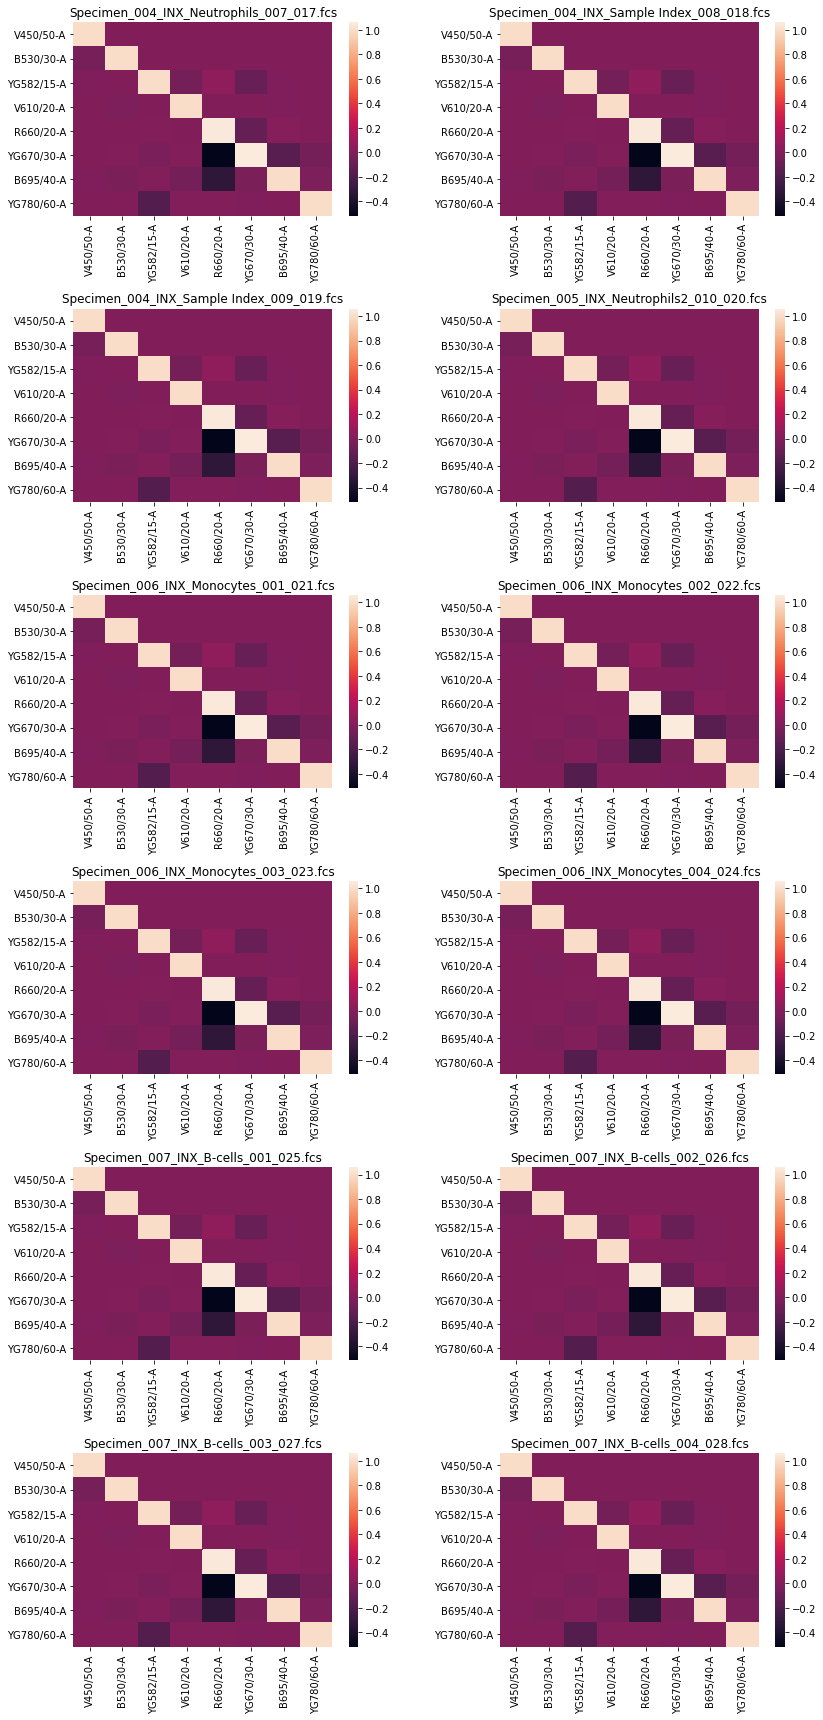

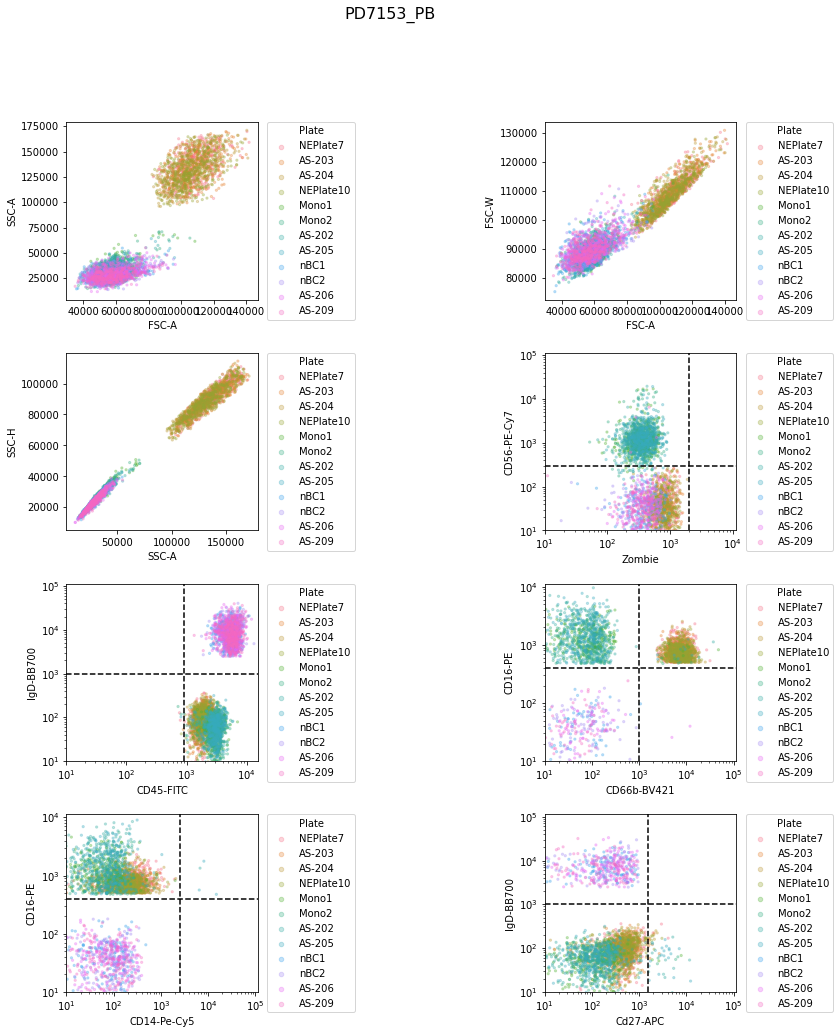

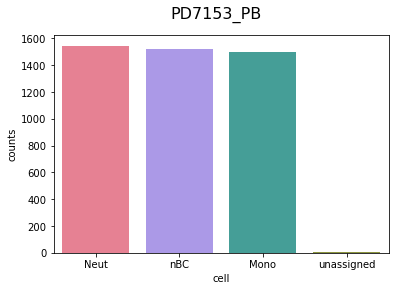

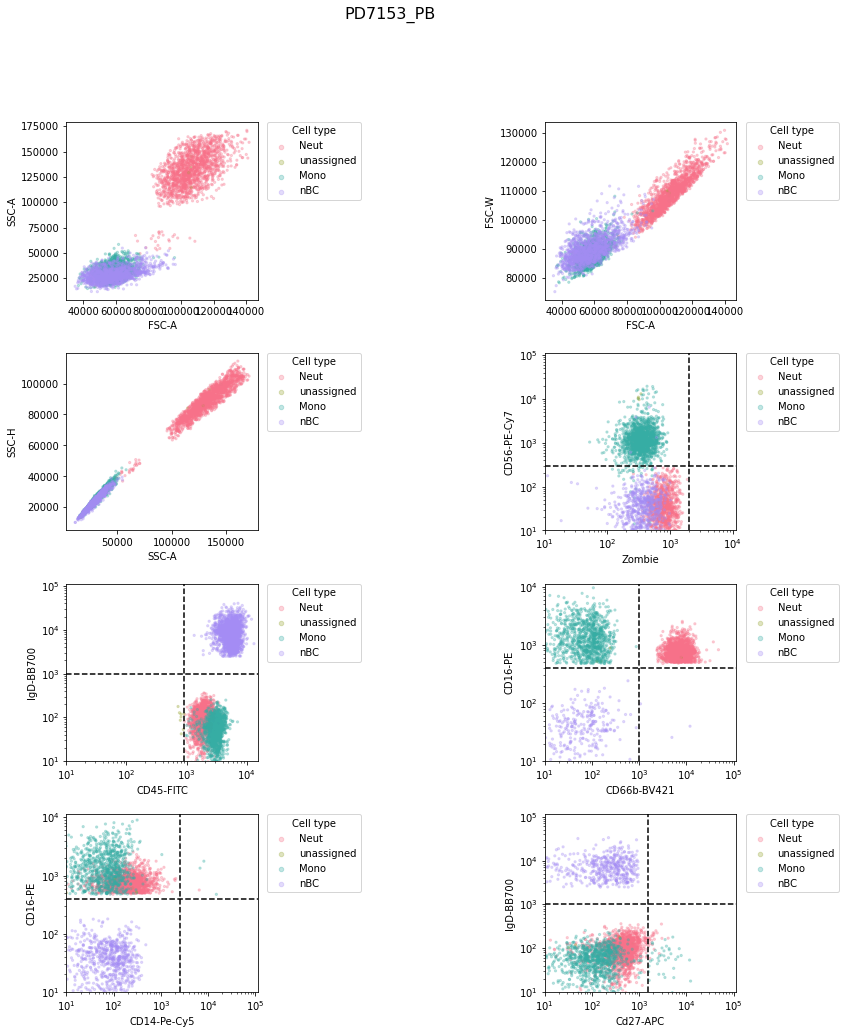

In [3]:
#PD7153 PB parameters

directory = '../Data/PD7153_PB/Indexed/'

#Make plate key
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['NEPlate7', 'AS-203','AS-204', 'NEPlate10', 'Mono1', 'Mono2', 'AS-202', 'AS-205', 'nBC1', 'nBC2' , 'AS-206', 'AS-209' ] #one plate splills over 2 files, rename later

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 400,
    'CD14-Pe-Cy5': 2500 ,
    'CD56-PE-Cy7': 300 ,
    'CD66b-BV421': 1000 ,
    'Zombie': 2000,
    'CD45-FITC': 900,
    'Cd27-APC': 1500,
    'IgD-BB700': 1000,
    'R780/60-A':1000
}
label = 'PD7153_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = True, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1967) = ', len(CD34assigned))
print('Number of PB wells (expect 4572) = ',len(PBassigned))
PD7153_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(PD7153_allcells_assigned))

Number of CD34 wells (expect 1967) =  1967
Number of PB wells (expect 4572) =  4572
Total number of wells =  6539


In [22]:
import importlib
importlib.reload(idh)

<module 'index_haps' from 'C:\\Users\\z3283497\\python\\Annatina\\AS_amplicons\\Code\\index_haps.py'>

PD7153_3
Cells with 10 reads for 3 genes =  1177


C:\Users\z3283497\python\Annatina\AS_amplicons\Code\index_haps.py:441: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


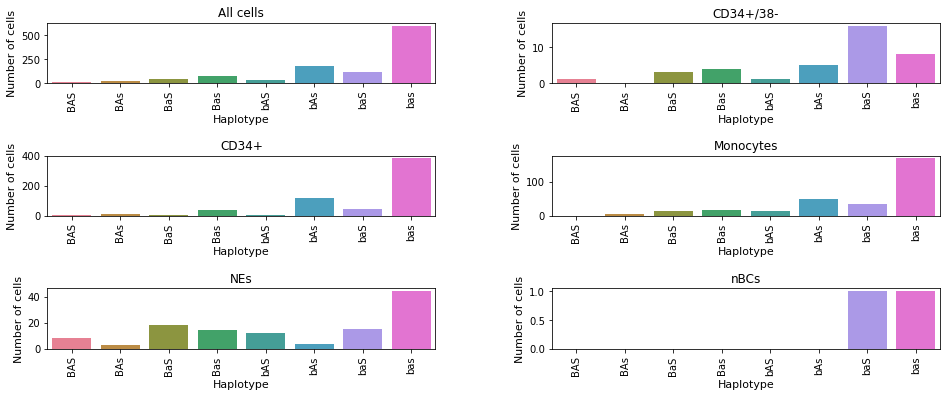

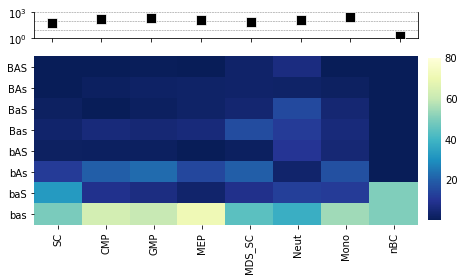

In [23]:
datafile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7153'
haps = 3
reads = 10
cutoff = 0.2
PD7153_plate = idh.data_retrieval(datafile, metadata, pt_id)
PD7153_haps = idh.call_haps(PD7153_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proportion mutated
PD7153_haps_indexed = pd.merge(PD7153_haps, PD7153_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(PD7153_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_2(PD7153_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [24]:
#After dicsussion with AS and looking at historical data the mutation order we think is most likely is B, A, S

In [25]:
#Drop nBC from following plots (very few cells)
cell_number2 = cell_number.copy()
if 'nBC' in cell_number2.columns:
    cell_number2.drop(columns = 'nBC', inplace = True)

In [26]:
#How many WT cells for each type
k = cell_number2.loc[['BAS','bAS', 'baS', 'bas']]
#How many mutated cells for each type
j = cell_number2.loc[['bAS', 'baS', 'bas']]
j.sum(axis = 0)

celltype
SC         49
CMP       116
GMP       155
MEP        88
MDS_SC     38
Neut       72
Mono      218
dtype: int64

In [27]:
#What is the proportion of mutated cells
y = cell_number2.loc[['bAS', 'baS', 'bas']]
y = y*100/y.sum(axis = 0)
ct = y.index.get_level_values(0)
y

celltype,SC,CMP,GMP,MEP,MDS_SC,Neut,Mono
Haplotype,,,,,,,
bAS,2.040816,1.724138,1.935484,0.000000,2.631579,16.666667,6.880734
baS,38.775510,12.068966,10.322581,4.545455,15.789474,20.833333,16.513761
bas,59.183673,86.206897,87.741935,95.454545,81.578947,62.500000,76.605505


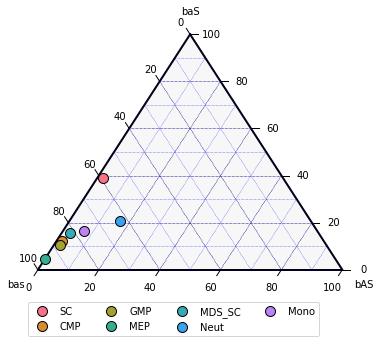

In [28]:
idh.tern_plot(y, pt_id, reads, cutoff)

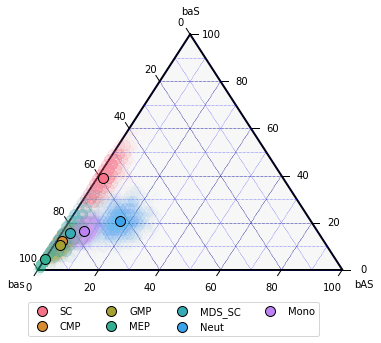

In [29]:
idh.tern_plot_cloud(y, j, pt_id, reads, cutoff)

<ipython-input-30-4d26abbf4af0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PD7153small3['mut_no'] = PD7153small3['Haplotype'].replace(mut_no)


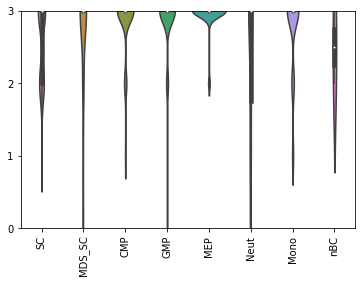

In [30]:
#Graphs to look at number of mutations per cell
PD7153small = PD7153_haps_indexed.loc[PD7153_haps_indexed['Haplotype'].isin(['BAS','bAS', 'baS', 'bas'])]
mut_no = dict(zip(['BAS','bAS', 'baS', 'bas'], [0,1,2,3])) 
PD7153small2 = PD7153small.loc[PD7153small['celltype'].isin(['SC','CMP',  'GMP','MEP', 'MDS_SC',  'Neut', 'Mono','nBC'])]
PD7153small3 = PD7153small2[['Haplotype', 'celltype']]
PD7153small3['mut_no'] = PD7153small3['Haplotype'].replace(mut_no)

fig, ax = plt.subplots()
colors = sns.color_palette('husl', n_colors = 8)
sns.violinplot(x = 'celltype', y = 'mut_no', ax = ax, data = PD7153small3, palette = colors, order = ['SC','MDS_SC','CMP',  'GMP', 'MEP',   'Neut', 'Mono','nBC'])
ax.set_ylim(0, 3)
ax.set_yticks([0,1,2,3])
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelrotation = 90)
fig.savefig('../Results/PD7153_no_muts_violin.png',bbox_inches='tight',dpi=300)


In [31]:
cell_number

celltype,SC,CMP,GMP,MEP,MDS_SC,Neut,Mono,nBC
Haplotype,,,,,,,,
BAS,0,0,1,0,2,8,0,0
BAs,0,2,5,3,2,3,5,0
BaS,1,0,3,3,3,18,14,0
Bas,2,9,11,7,11,14,18,0
bAS,1,2,3,0,1,12,15,0
bAs,7,32,51,17,14,4,51,0
baS,19,14,16,4,6,15,36,1
bas,29,100,136,84,31,45,167,1
